In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import mpld3

bug_df = pd.read_csv('My_Requests_15_12_2022_11_30.csv', index_col='Key', parse_dates=['Created', 'Updated'])
bug_df['Created'] = bug_df['Created'].dt.date
bug_df['Updated'] = bug_df['Updated'].dt.date
bug_df = bug_df.sort_values(by=('Priority'), ascending=True)

#convert date column to datetime and subtract one week
bug_df['Created'] = pd.to_datetime(bug_df['Created']) - pd.to_timedelta(7, unit='d')

#calculate sum of values, grouped by week
bug_df_week = bug_df.groupby([pd.Grouper(key='Created', freq='W')]).count()

bug_df_week.head(60)

Plot for Count of Bugs by Creation Date

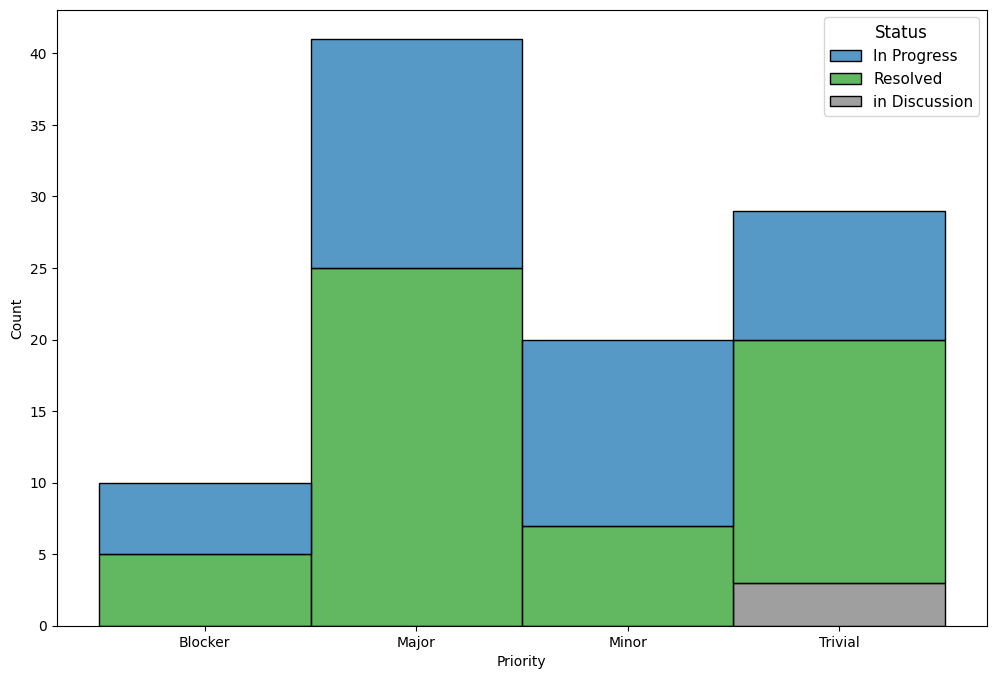

In [2]:
bug_df.sort_values(by='Status', ascending=True)
fig, ax = plt.subplots(figsize=(12,8))
palette = {'Customer Action':'tab:red','In Progress':'tab:blue', 'Open':'tab:orange', 'Resolved':'tab:green', 'in Discussion':'tab:grey'}
sns.set_context('notebook')
sns.histplot(data=bug_df, x='Priority', hue='Status', multiple='stack', palette=palette)
plt.savefig(fname='Count_By_Priority')

In [3]:
html_str = mpld3.fig_to_html(fig)
Html_file= open("count_by_priority.html","w")
Html_file.write(html_str)
Html_file.close()

Count by Priority

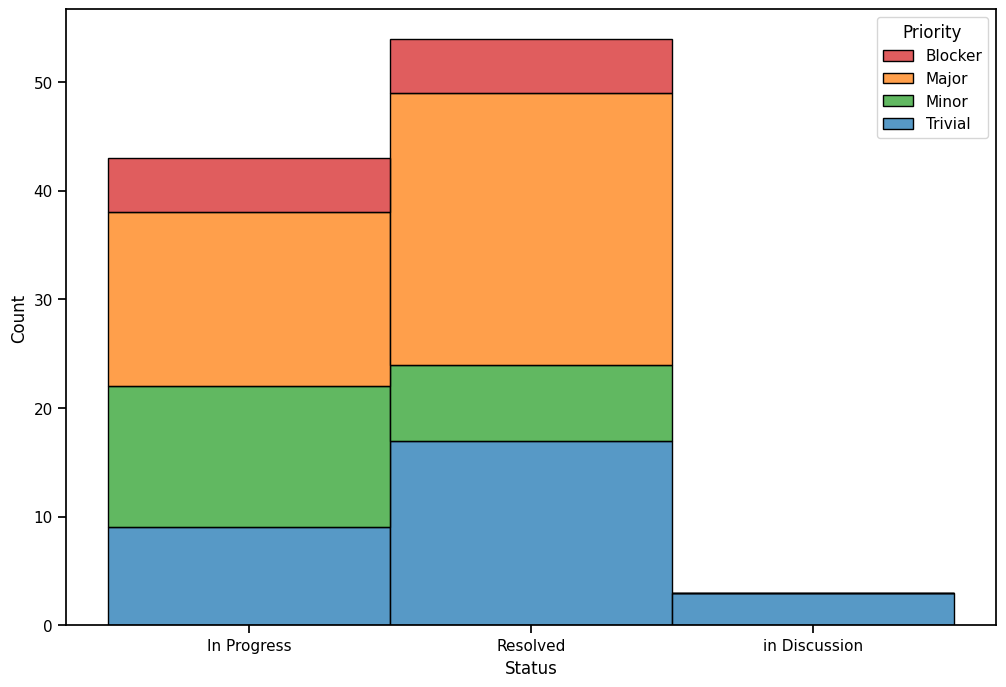

In [4]:
bug_df.sort_values(by='Priority', ascending=True)
fig, ax = plt.subplots(figsize=(12,8))
palette = {'Blocker':'tab:red', 'Major':'tab:orange', 'Minor':'tab:green', 'Trivial':'tab:blue'}
sns.set_context('notebook')
sns.histplot(data=bug_df, x='Status', hue='Priority', multiple='stack', palette=palette)
plt.savefig(fname='Count_By_Status')

In [5]:
html_str = mpld3.fig_to_html(fig)
Html_file= open("count_by_status.html","w")
Html_file.write(html_str)
Html_file.close()

In [6]:
bug_df_count = bug_df.groupby('Created').count()
bug_df_count['Adj_Sum'] = bug_df_count['Type'] - bug_df_count['Resolution']
bug_df_cumsum = bug_df_count.cumsum() 
#bug_df_count.head()
bug_df_cumsum.head(60)


,Type,Reporter,Summary,Status,Priority,Resolution,Updated,Assignee,Adj_Sum
Created,,,,,,,,,
2022-11-10,12,12,12,12,12,7,12,12,5
2022-11-11,18,18,18,18,18,11,18,18,7
2022-11-14,19,19,19,19,19,12,19,19,7
2022-11-15,21,21,21,21,21,13,21,21,8
2022-11-16,26,26,26,26,26,17,26,26,9
2022-11-17,28,28,28,28,28,18,28,28,10
2022-11-18,29,29,29,29,29,19,29,29,10
2022-11-21,37,37,37,37,37,27,37,37,10
2022-11-22,43,43,43,43,43,30,43,43,13


In [7]:
bug_df_adjsum = pd.DataFrame()
bug_df_adjsum['Adj_Sum'] = bug_df_cumsum['Adj_Sum']
bug_df_adjsum = bug_df_adjsum.reset_index()
bug_df_adjsum.head()

,Created,Adj_Sum
0,2022-11-10,5
1,2022-11-11,7
2,2022-11-14,7
3,2022-11-15,8
4,2022-11-16,9


In [8]:
#sns.barplot(data=bug_df_adjsum, x='Updated', y='Adj_Sum')

In [9]:

bug_df_count_upd = bug_df.groupby('Updated').count()
bug_df_count_upd['Res_Sum'] = bug_df_count_upd['Resolution']
bug_df_cumsum_res = bug_df_count_upd.cumsum()
bug_df_cumsum_res.head()


,Type,Reporter,Created,Summary,Status,Priority,Resolution,Assignee,Res_Sum
Updated,,,,,,,,,
2022-11-10,1,1,1,1,1,1,1,1,1
2022-11-11,2,2,2,2,2,2,2,2,2
2022-11-17,7,7,7,7,7,7,4,7,4
2022-11-20,8,8,8,8,8,8,4,8,4
2022-11-21,10,10,10,10,10,10,5,10,5


In [10]:
bug_df_hist_res = bug_df.query('Resolution != ["Fixed"]')
bug_df_hist_res.head()


,Type,Reporter,Created,Summary,Status,Priority,Resolution,Updated,Assignee
Key,,,,,,,,,
CP-72178,Report a Bug,Jake Daylong,2022-12-15,System calculating incorrect decimal places fo...,In Progress,Blocker,NaN,2022-12-15,Venakata Rao Nakka
CP-71021,Report a Bug,Dmitry Ischenko,2022-11-23,Unable to view or modify user in system. Pote...,In Progress,Blocker,NaN,2022-12-08,suresh.katta
CP-71619,Report a Bug,Jake Daylong,2022-12-07,Unable to Consolidate Shipments,In Progress,Blocker,NaN,2022-12-14,Venakata Rao Nakka
CP-71628,Report a Bug,Jake Daylong,2022-12-07,NMFCNO validation needs to be removed for frei...,In Progress,Blocker,NaN,2022-12-14,Venakata Rao Nakka
CP-72117,Report a Bug,Jake Daylong,2022-12-14,Batch Ship Requests are not processing,In Progress,Blocker,NaN,2022-12-15,suresh.katta


In [11]:
bug_df_hist = pd.DataFrame()
bug_df_hist['Adj_Sum'] = bug_df_cumsum['Adj_Sum']
bug_df_hist.head()

,Adj_Sum
Created,
2022-11-10,5
2022-11-11,7
2022-11-14,7
2022-11-15,8
2022-11-16,9


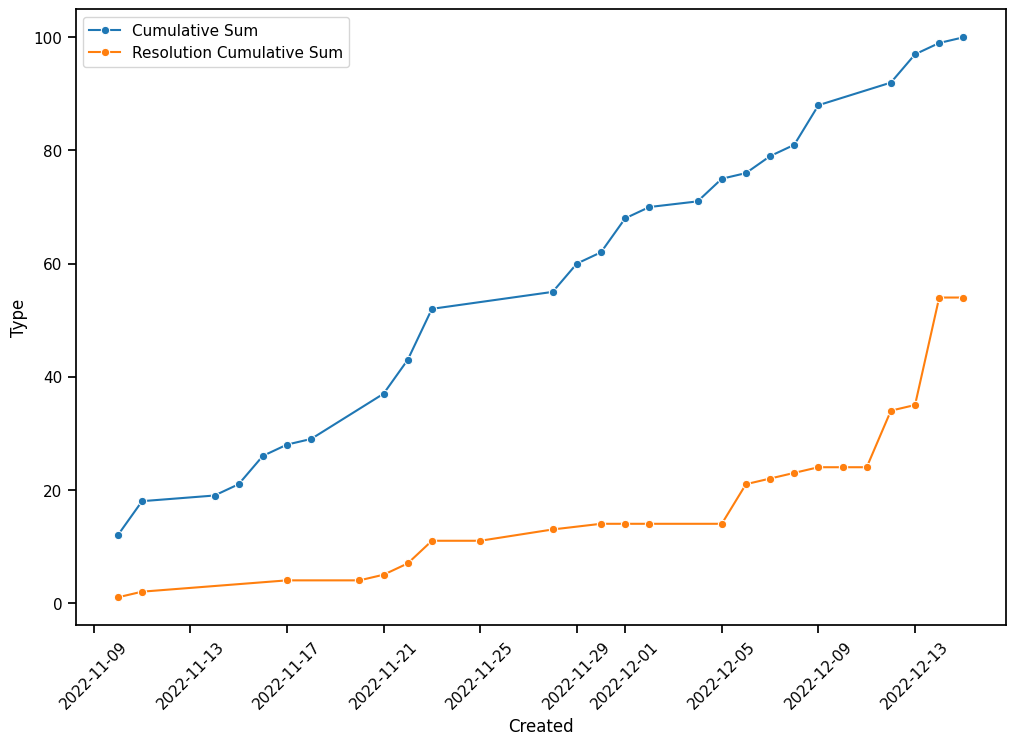

In [12]:
fig, ax = plt.subplots(figsize=(12,8))
plt.xticks(rotation=45)
sns.lineplot(data=bug_df_cumsum, x='Created', y='Type', marker='o', legend=True, label='Cumulative Sum')
sns.lineplot(data=bug_df_cumsum_res, x='Updated', y='Res_Sum', marker='o', legend=True, label='Resolution Cumulative Sum')

plt.savefig(fname='Cumsum_Total_vs_Resolved')

In [13]:
html_str = mpld3.fig_to_html(fig)
Html_file= open("Sum_total_vs_resolved.html","w")
Html_file.write(html_str)
Html_file.close()

In [14]:
#bug_df_hist_res = bug_df_hist_res.groupby('Created').count()
bug_df_hist_res.head()

,Type,Reporter,Created,Summary,Status,Priority,Resolution,Updated,Assignee
Key,,,,,,,,,
CP-72178,Report a Bug,Jake Daylong,2022-12-15,System calculating incorrect decimal places fo...,In Progress,Blocker,NaN,2022-12-15,Venakata Rao Nakka
CP-71021,Report a Bug,Dmitry Ischenko,2022-11-23,Unable to view or modify user in system. Pote...,In Progress,Blocker,NaN,2022-12-08,suresh.katta
CP-71619,Report a Bug,Jake Daylong,2022-12-07,Unable to Consolidate Shipments,In Progress,Blocker,NaN,2022-12-14,Venakata Rao Nakka
CP-71628,Report a Bug,Jake Daylong,2022-12-07,NMFCNO validation needs to be removed for frei...,In Progress,Blocker,NaN,2022-12-14,Venakata Rao Nakka
CP-72117,Report a Bug,Jake Daylong,2022-12-14,Batch Ship Requests are not processing,In Progress,Blocker,NaN,2022-12-15,suresh.katta


<AxesSubplot: xlabel='Updated', ylabel='Count'>

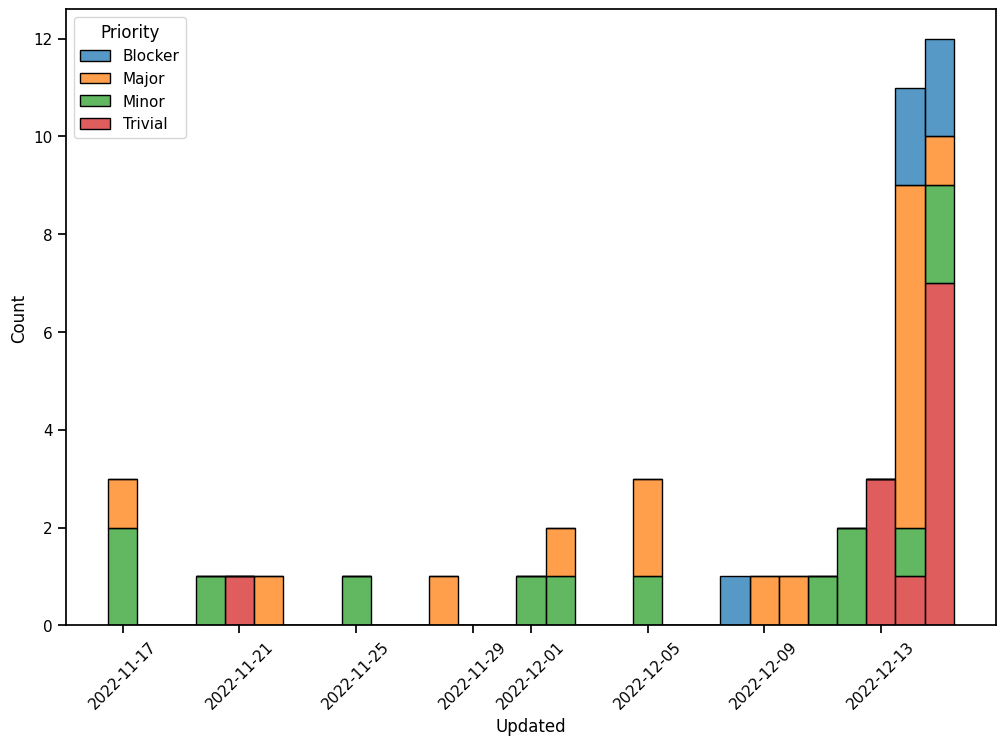

In [17]:
fig, ax = plt.subplots(figsize=(12,8))
plt.xticks(rotation=45)
sns.histplot(data=bug_df_hist_res, x='Updated', hue='Priority', multiple='stack')

Cumulative Sum of Total Bugs (Adjusted for Resolved bugs) and Cumulative Sum of Resolved Bugs